# 5 HW
Andrzej Zapała

### Bazowy LGBM
Wytrenowano model Lightgbm (lgbm) wykorzystjąc dataset przeżywalności katastrofy titanica.

Wykorzystano metruce auc w celu określania jakości modelu, stąd w wykresach i tabelach dropout loss jest wyrażany w jednostach metryki auc. 

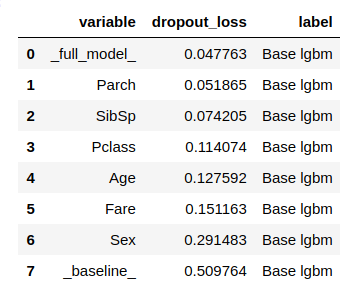

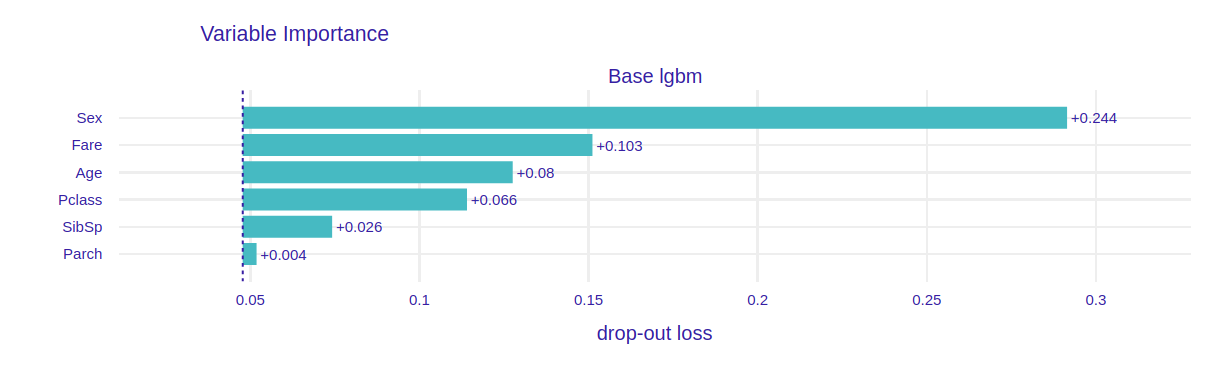

Najważnieszą cechą jest płeć oraz opłata za przejazd w następnej kolejnsci wiek i  klasa. Ważności zmiennych są zgodne ze wcześniejszymi technikami (shap, break-down, lokalnie LIME)

### Modele do porównania:
* Lgbm wykorzystujący one-hot encoding zamiast bezpośrednio przekazywać zmienne kategoryczne
* Sieć neuronowa
* Regresja logistyczna
* Lgbm bez zmiennej Fare

### Lgbm One-Hot

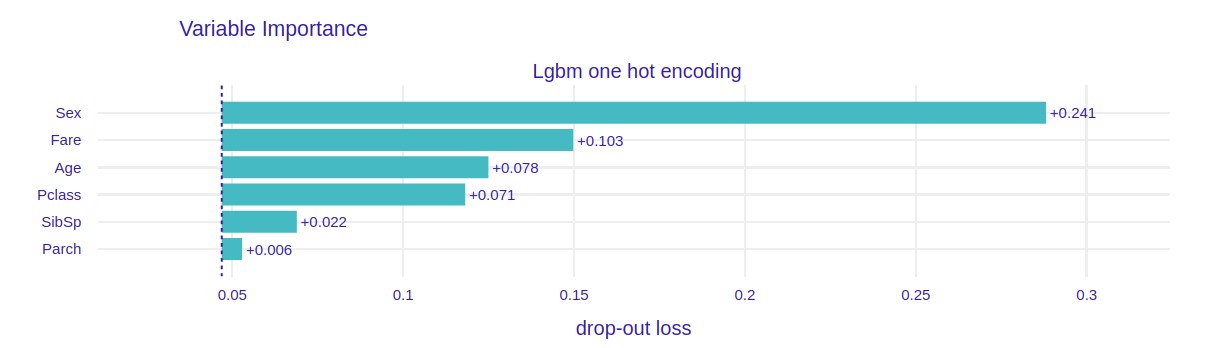

Wykorzystując kodowanie one-hot zmiennych kategorycznych w modelu lightgbm otrzymaliśmy prawie identyczne ważności zmiennych jak w modelu bazowym (traktującym daną zmienna jako kategoryczną i uwzglądniając to w treningu przy dokonywaniu podziałów, podziały dla zmiennych kategorycznych wykorzystują tylko operatory = , != ). Model osiągnął również praktycznie identyczną skuteczność, skąd możemy przypuszczać, że dla małego zbioru wartości zmiennych kategorycznych dwie metody inaczej uwzględniające zmienne kategorczyne są zbliżone do siebie, dają podobne do siebie modele.

### Neural Network

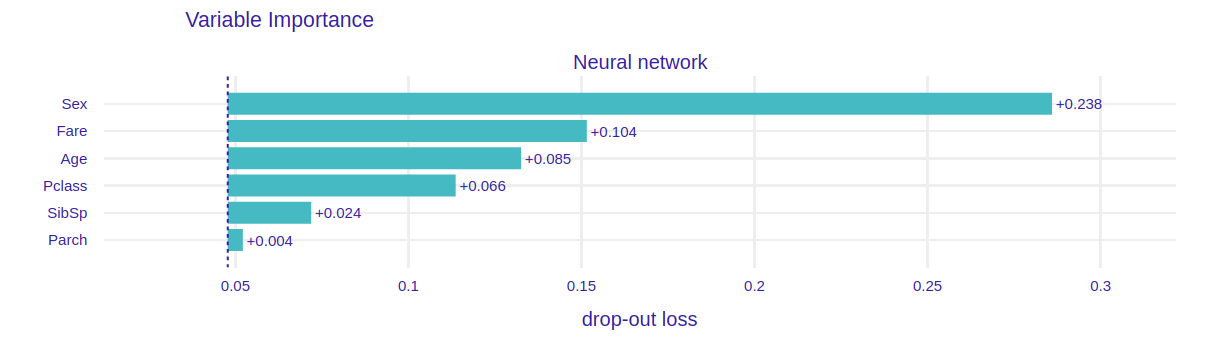

Ważności zmiennych dla sieci neuronowej są mocno zblizone do ważności dla motody drzewiastej lgbm. Osiągnięto też porównywalne auc (0.88 dla siecie, 0.91 dla lgbm). Nie widać istotnych różnic, największa jest w dla zmiennej Sex (dla lgbm większa o 0.006), a największa względna dla zmiennej Age (dla sieci większa o 6.25 %).

### Logistic Regression

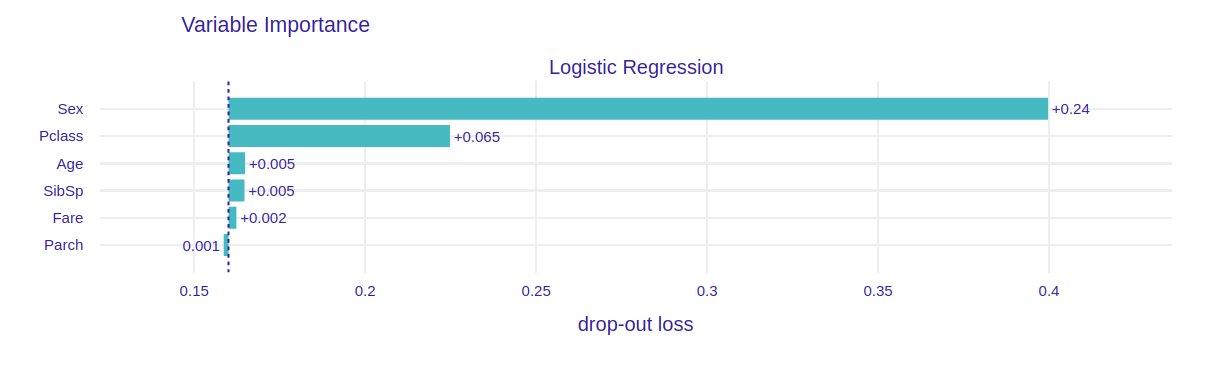

Regresja logistyczna ma zupełnie odmienne ważności zmiennych. Do predykcji wykorzystuje dwie zmienne kategoryczne Sex, Pclass (zmienne ilościowe zostały znormalizowane). Pozostałe zmienne mają niską skuteczność, gdzie Parch (liczba rodziców lub dzieci) pogarszał metryki modelu. Model regresji logistycznej osiągnął auc 0.86 w porównaniu do 0.91 modelu lgbm. Z uwagi na niską ważność zmiennych ilościowych wytrenowałem model regesji  wykorzystujący tylko te zmienne.  Osiągnąłem auc 0.76. W tym przypadku zmienna Fare zdominowała pod względem ważności pozostałe zmienne. 

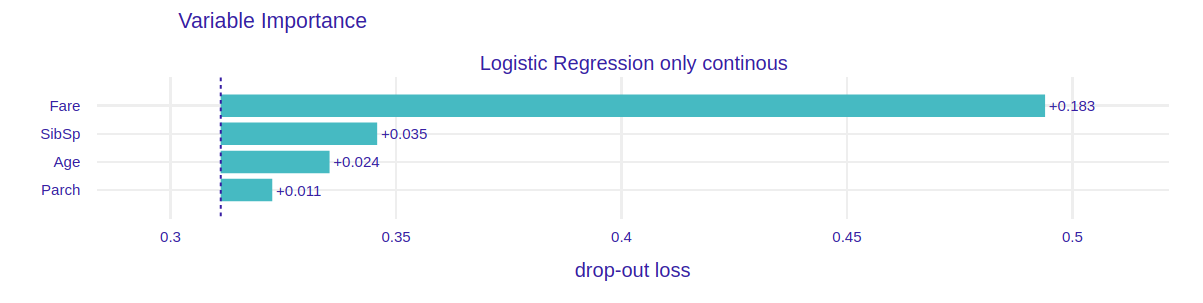

### LGBM without Fare

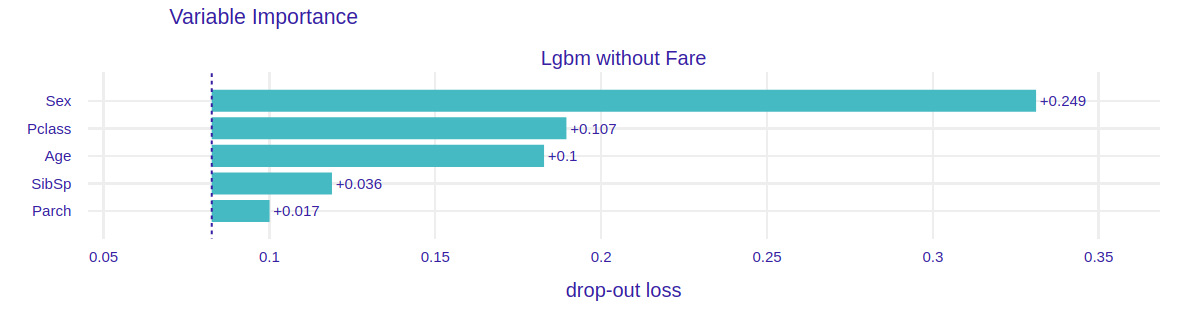

Ze wczęsniejszych analiz w poprzednich zadaniach domowych wynikało, że zmienna Fare jest skorelowana ze zmienną Pclass. Jest to również zgodne z rzeczywistąścią, za bilety z wyższej klasy płaci się więcej. Stąd usunąłem zmienną Fare z modelu lgbm. Z uzyskanych wartości ważności zmiennych możemy zauważyć, że zmienna Pclass znacznie zyskała na ważności z 0.06 drop-out loss do 0.107 stając się istotniejsza od zmiennej Age. To kolejny raz wskazuje, że zmienne Fare i Pclass są częściowo komplementarne.

### Podsumowanie

* Architektura modelu wpływa na ważność zmiennych. Różnica jest szczególnie widoczna dla modeli o różnej skuteczności. (Lgbm/net vs regresja logistyczna)
* Transformacja one-hot encoding nie wpływa na model lgbm. Lgbm radzi sobie praktycznie identycznie na nie zakodowanych kolumnowo danych kategorycznych. Ważności zmiennych są identyczne dla tych dwóch modeli.
* Zbiró zmiennych modelu ma istosne znaczenie w ocenie ważności. Różnicę są szczególnie widoczne dla zmiennych skorelowanych.